# INSTRUÇÃO PRÁTICA 009
## Revisao e consolidaçao do conteúdo de __Pandas__ avançado.
Para a pratica serão utilizados dados de estações metereologicas de Salvador dos anos de 2003, 2013 e 2023, diponiveis em: [Instituto Nacional de Meteorologia](https://portal.inmet.gov.br/dadoshistoricos). 

Os dados foram limpos e unidos em um unico DataFrama, com MultiIndex para colunas e indexadas por um DateTimeIndex.

### Carregando os dados

In [1]:
import pandas as pd

estacao_ssa_2003 = pd.read_csv('./datasets/estacao_Salvador_2003.CSV', header=8, sep=';', encoding='latin-1')
estacao_ssa_2013 = pd.read_csv('./datasets/estacao_Salvador_2013.CSV', header=8, sep=',', encoding='utf-8')
estacao_ssa_2023 = pd.read_csv('./datasets/estacao_Salvador_2023.CSV', header=8, sep=';', encoding='latin-1')

### Tratamento de dados

1. Removendo coluna extra unnamed

In [2]:
estacao_ssa_2003.drop(columns=['Unnamed: 19'], inplace=True)
estacao_ssa_2023.drop(columns=['Unnamed: 19'], inplace=True)

2. Unificando nomes de colunas

In [3]:
# pegando lista de nomes de colunas de cada dataframe
colunas_2003 = estacao_ssa_2003.columns.values.tolist() 
colunas_2013 = estacao_ssa_2013.columns.values.tolist()
colunas_2023 = estacao_ssa_2023.columns.values.tolist()

# renomeando colunas diferentes para o nome da coluna do dataframe de 2003
for c_2003, c_2013, c_2023 in zip(colunas_2003, colunas_2013, colunas_2023):
    if c_2003 != c_2013 or c_2003 != c_2023:
        estacao_ssa_2013.rename(columns={c_2013: c_2003}, inplace=True)
        estacao_ssa_2023.rename(columns={c_2023: c_2003}, inplace=True)
        

# concatenando os dataframes
estacao_ssa = pd.concat([estacao_ssa_2003, estacao_ssa_2013, estacao_ssa_2023], ignore_index=True)

3. Criando DateTimeIndex

In [4]:
# criando DateTimeIndex a partir da coluna DATA (YYYY-MM-DD) e HORA (UTC)
estacao_ssa_index = pd.to_datetime(estacao_ssa['DATA (YYYY-MM-DD)'] + ' ' + estacao_ssa_2003['HORA (UTC)'], utc=True)

# removendo as colunas originais DATA (YYYY-MM-DD) e HORA (UTC)
estacao_ssa.drop(['DATA (YYYY-MM-DD)', 'HORA (UTC)'], axis=1, inplace=True)

# Define a coluna DATA HORA como índice
estacao_ssa.set_index(estacao_ssa_index, inplace=True)

4. Criando MultiIndex para colunas

In [5]:
# agrupando parametros de medição
nivel_1 = ['precipitacao'] + ['pressao']*3 + ['radiacao'] + ['temperatura']*6 + ['umidade']*3 + ['velocidade do vento']*3
nivel_2 = colunas_2003[2:]

# definindo multiindex para as colunas
index_col = pd.MultiIndex.from_arrays([nivel_1, nivel_2], names=['medicao', 'tipo'])

estacao_ssa.columns = index_col

5. Removendo colunas desnecessárias

In [6]:
estacao_ssa.drop(['pressao', 'radiacao', 'umidade', 'velocidade do vento'], axis=1, inplace=True)

6. Transformando colunas de string para float

In [7]:
# substiduindo valores , por .
estacao_ssa.replace(',', '.', regex=True, inplace=True)

# convertendo para float
estacao_ssa = estacao_ssa.astype('float64')

7. Tratando valores nulos

In [8]:
# tiranddo todos os possiveis valores nulos
estacao_ssa.replace(['-9999', -9999, -9999.0, '-9999.0'], value= None, inplace=True)

# preenchendo valores nulos
estacao_ssa.bfill(inplace=True)

### DataFrame final

In [9]:
estacao_ssa.head()

medicao                                       precipitacao   
tipo                      PRECIPITAÇÃO TOTAL, HORÁRIO (mm)   
2003-01-01 00:00:00+00:00                              0.0  \
2003-01-01 01:00:00+00:00                              0.0   
2003-01-01 02:00:00+00:00                              0.0   
2003-01-01 03:00:00+00:00                              0.0   
2003-01-01 04:00:00+00:00                              0.0   

medicao                                                    temperatura   
tipo                      TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)   
2003-01-01 00:00:00+00:00                                         26.4  \
2003-01-01 01:00:00+00:00                                         26.4   
2003-01-01 02:00:00+00:00                                         26.4   
2003-01-01 03:00:00+00:00                                         26.4   
2003-01-01 04:00:00+00:00                                         26.4   

medicao                                                          
tipo                      TEMPERATURA DO PONTO DE ORVALHO (°C)   
2003-01-01 00:00:00+00:00                                 22.0  \
2003-01-01 01:00:00+00:00                                 22.0   
2003-01-01 02:00:00+00:00                                 22.0   
2003-01-01 03:00:00+00:00                                 22.0   
2003-01-01 04:00:00+00:00                                 22.0   

medicao                                                                
tipo                      TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)   
2003-01-01 00:00:00+00:00                                       27.2  \
2003-01-01 01:00:00+00:00                                       27.2   
2003-01-01 02:00:00+00:00                                       27.2   
2003-01-01 03:00:00+00:00                                       27.2   
2003-01-01 04:00:00+00:00                                       27.2   

medicao                                                                
tipo                      TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)   
2003-01-01 00:00:00+00:00                                       26.3  \
2003-01-01 01:00:00+00:00                                       26.3   
2003-01-01 02:00:00+00:00                                       26.3   
2003-01-01 03:00:00+00:00                                       26.3   
2003-01-01 04:00:00+00:00                                       26.3   

medicao                                                                      
tipo                      TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   
2003-01-01 00:00:00+00:00                                             22.6  \
2003-01-01 01:00:00+00:00                                             22.6   
2003-01-01 02:00:00+00:00                                             22.6   
2003-01-01 03:00:00+00:00                                             22.6   
2003-01-01 04:00:00+00:00                                             22.6   

medicao                                                                     
tipo                      TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)  
2003-01-01 00:00:00+00:00                                             21.0  
2003-01-01 01:00:00+00:00                                             21.0  
2003-01-01 02:00:00+00:00                                             21.0  
2003-01-01 03:00:00+00:00                                             21.0  
2003-01-01 04:00:00+00:00                                             21.0

In [10]:
estacao_ssa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2003-01-01 00:00:00+00:00 to NaT
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   (precipitacao, PRECIPITAÇÃO TOTAL, HORÁRIO (mm))                 26280 non-null  float64
 1   (temperatura, TEMPERATURA DO AR - BULBO SECO, HORARIA (°C))      26280 non-null  float64
 2   (temperatura, TEMPERATURA DO PONTO DE ORVALHO (°C))              26280 non-null  float64
 3   (temperatura, TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C))        26280 non-null  float64
 4   (temperatura, TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C))        26280 non-null  float64
 5   (temperatura, TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C))  26280 non-null  float64
 6   (temperatura, TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C))  26280 non-null  float64
dtypes: float64(7)
me

In [11]:
estacao_ssa.describe()

medicao                     precipitacao   
tipo    PRECIPITAÇÃO TOTAL, HORÁRIO (mm)   
count                       26280.000000  \
mean                            0.202785   
std                             1.333296   
min                             0.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                            52.000000   

medicao                                  temperatura   
tipo    TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)   
count                                   26280.000000  \
mean                                       25.867500   
std                                         2.377785   
min                                        19.500000   
25%                                        24.000000   
50%                                        25.600000   
75%                                        27.300000   
max                                        39.700000   

medicao                                        
tipo    TEMPERATURA DO PONTO DE ORVALHO (°C)   
count                           26280.000000  \
mean                               21.679768   
std                                 1.382037   
min                                14.700000   
25%                                20.700000   
50%                                21.900000   
75%                                22.600000   
max                                26.600000   

medicao                                              
tipo    TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)   
count                                 26280.000000  \
mean                                     26.370327   
std                                       2.527563   
min                                      20.100000   
25%                                      24.400000   
50%                                      26.000000   
75%                                      28.000000   
max                                      43.300000   

medicao                                              
tipo    TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)   
count                                 26280.000000  \
mean                                     25.393565   
std                                       2.185660   
min                                      19.300000   
25%                                      23.700000   
50%                                      25.200000   
75%                                      26.700000   
max                                      33.000000   

medicao                                                    
tipo    TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   
count                                       26280.000000  \
mean                                           22.143900   
std                                             1.449447   
min                                            15.300000   
25%                                            21.200000   
50%                                            22.300000   
75%                                            23.200000   
max                                            27.400000   

medicao                                                   
tipo    TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)  
count                                       26280.000000  
mean                                           21.228242  
std                                             1.421677  
min                                            -1.800000  
25%                                            20.300000  
50%                                            21.500000  
75%                                            22.300000  
max                                            25.100000

### Analise de dados

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

1. Subplot com evolução das temperaturas médias e acumulado de precipitações nos três anos.

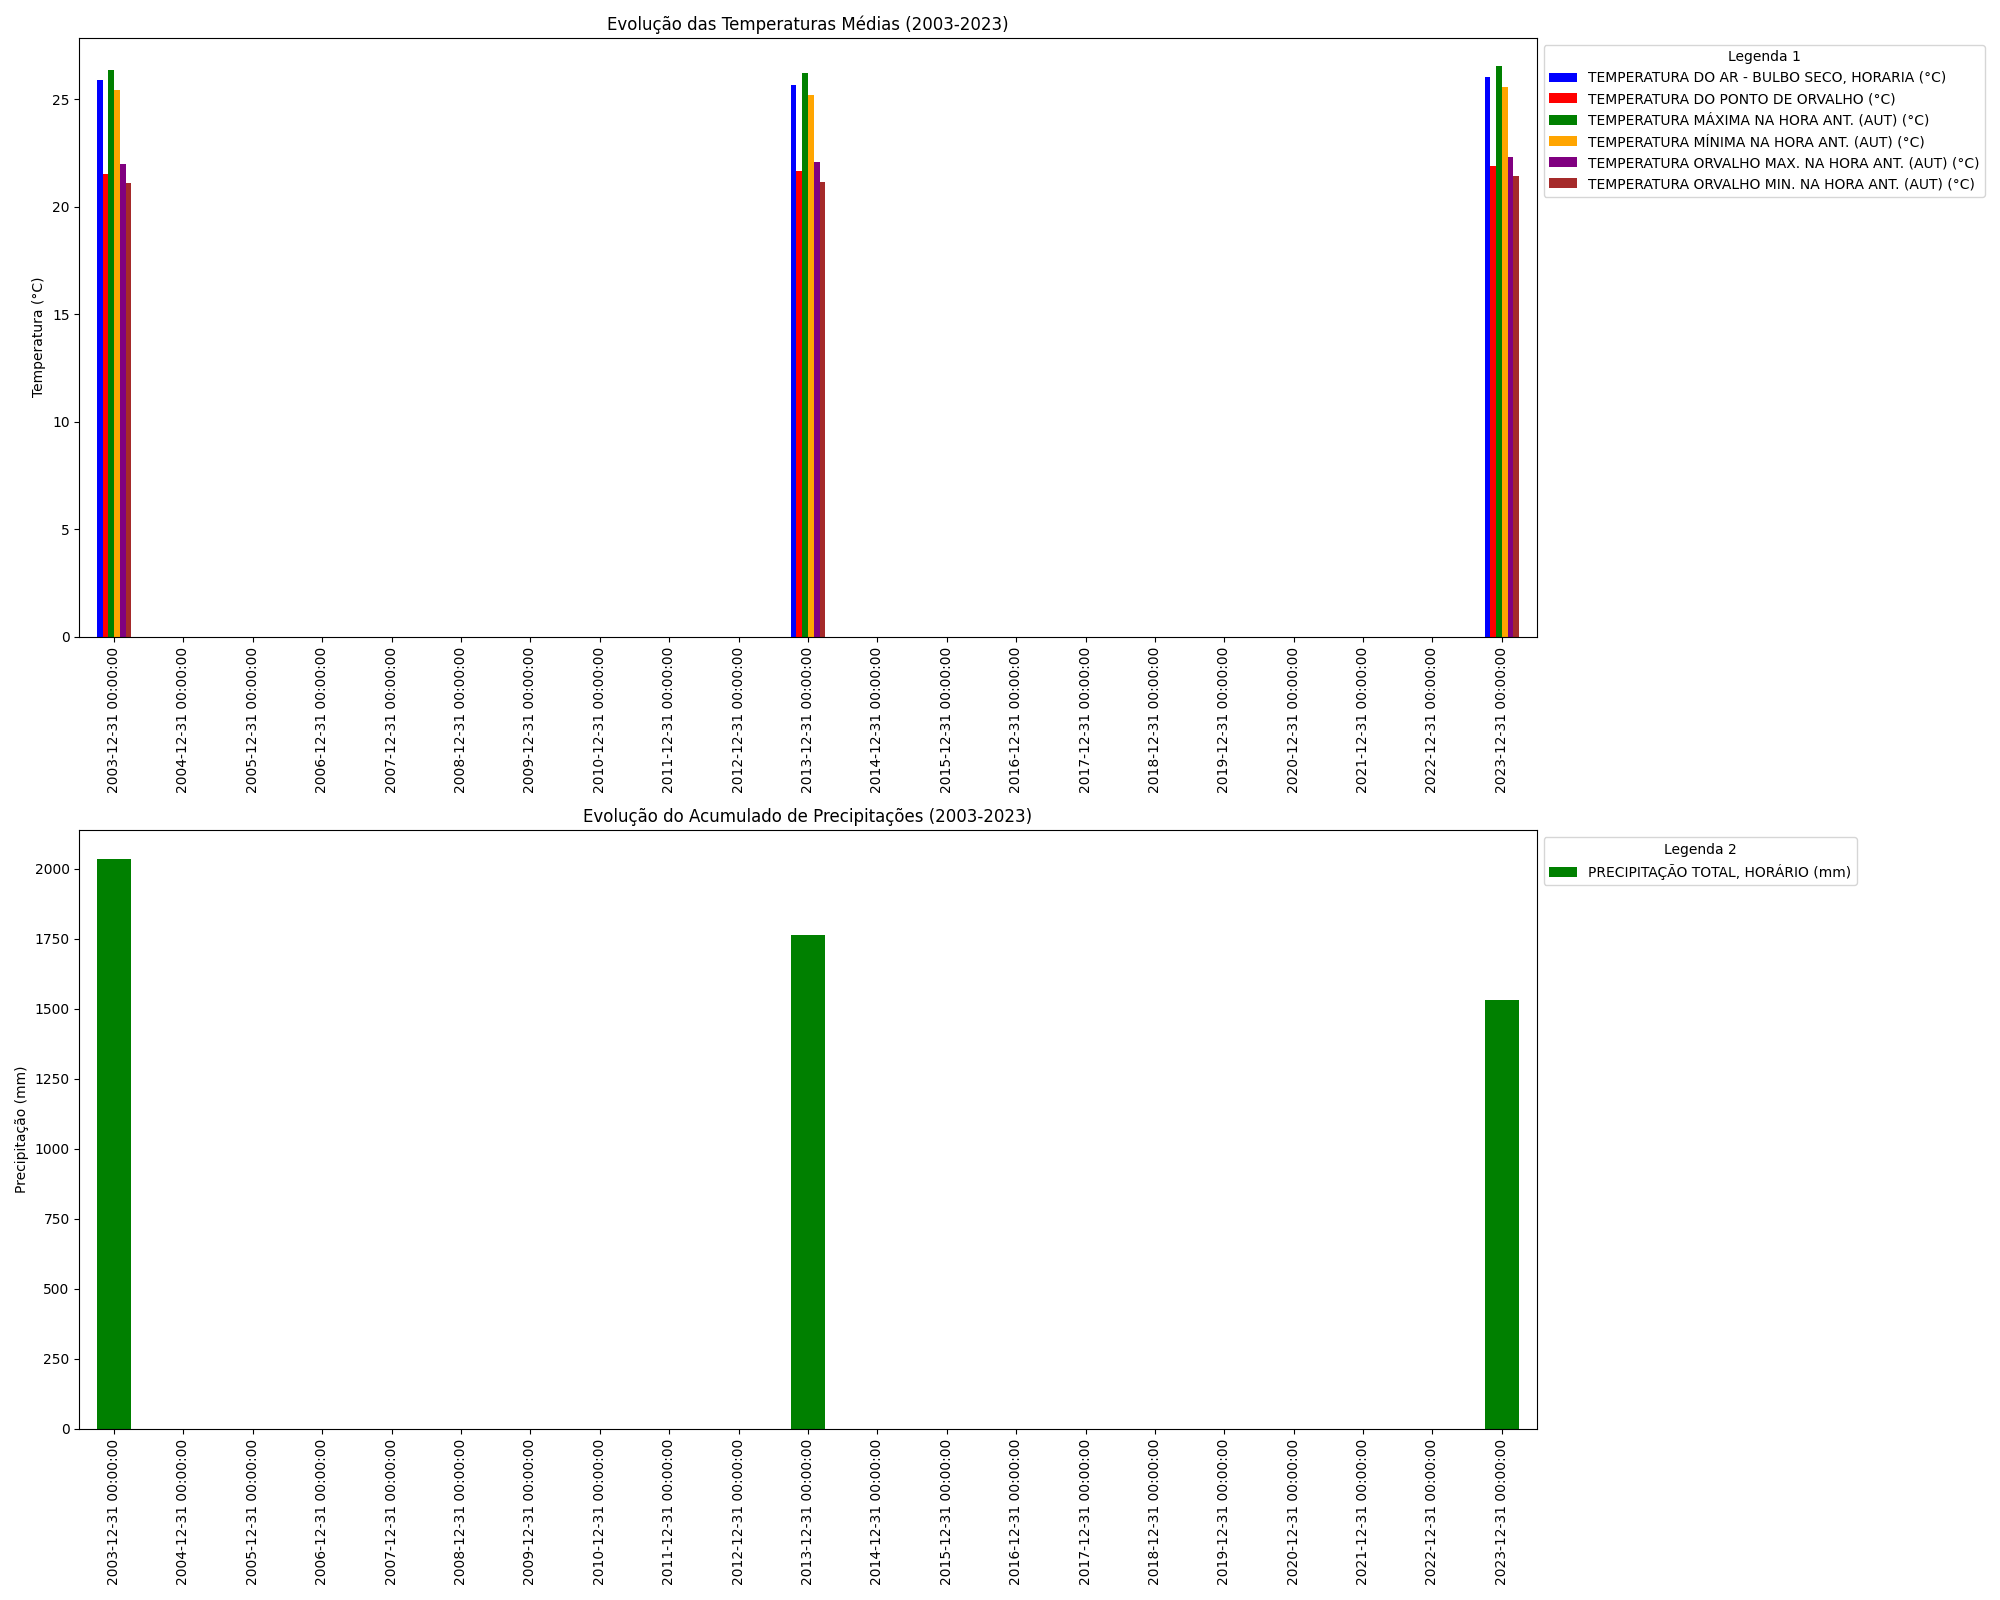

In [78]:
import matplotlib.pyplot as plt

# Ajuste o tamanho da figura
fig, axs = plt.subplots(2, 1, figsize=(20, 16))

# Definindo as cores para cada ano
cores_temperaturas = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'gray', 'pink', 'cyan', 'magenta', 'olive']

# Plotando a evolução das temperaturas médias
temperaturas_medias_anuais.plot.bar(ax=axs[0], color=cores_temperaturas, label='Temperatura Média')

# Configurações do primeiro subplot
axs[0].set_title('Evolução das Temperaturas Médias (2003-2023)')
axs[0].set_ylabel('Temperatura (°C)')

# Plotando o acumulado de precipitações
acumulado_precipitacoes_anuais.plot.bar(ax=axs[1], color='green', label='Acumulado de Precipitações')

# Configurações do segundo subplot
axs[1].set_title('Evolução do Acumulado de Precipitações (2003-2023)')
axs[1].set_ylabel('Precipitação (mm)')

# Adicionando legenda fora do gráfico
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Legenda 1')
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Legenda 2')

# Ajustando layout
plt.tight_layout()
plt.show()


2. Acumulado de precipitações de Junho nos três anos.

3. Temperatura media de cada um dos dias de Março nos três anos.

4. Temperatura máxima e mínima de cada uma das estações nos tres anos. Sendo:
   - Verão (Janeiro, Fevereiro e Março)
   - Outono (Abril, Maio e Junho) 
   - Inverno (Julho, Agosto e Setembro)
   - Primavera (Outubro, Novembro e Dezembro).

5. Comportamente de temperatura media do dia 28 de Setembro em cada um dos intervalos do dia dos três anos. Sendo:
   - Madrugada (00:00 a 06:00), 
   - Manha (06:00 a 12:00)
   - Tarde (12:00 a 18:00)
   - Noite (18:00 a 00:00)